# NF1 

0. requirements

In [0]:
!pip install nf1

1. imports

In [0]:
from nf1 import NF1
import ast

2. setup

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


2.1 datapaths

In [0]:
datapath = 'gdrive/My Drive/data'
folder = '/amazon'
comm_file = '/amazon_comm_025_3.txt'
gt_file = '/amazon_comm_all_gt.txt'

output_name = "/amazon_demon"
output_folder = "/output"

2.2 F1 statistics

In [9]:

# read the output of the algorithm
comms = []
with open(datapath + folder + comm_file ) as fh:
     for line in fh:
         comms.append(ast.literal_eval(line.strip(("\n"))))

# read the ground truth of the dataste
comms_gt = []
with open(datapath + folder + gt_file) as fh:
     for line in fh:
         comms_gt.append(ast.literal_eval(line.strip(("\n"))))

# preform NF1 measure
nf = NF1(comms, comms_gt)
results = nf.summary()

print(results['scores'])
print(results['details'])


with open(datapath+output_folder + output_name + '_output_file.txt', "w+") as f:
    #f.write(nf.summary())
    f.write(str(results['scores'])+'\n')
    f.write(str(results['details']))
    

                                 Value
Index                                 
Ground Truth Communities  75149.000000
Identified Communities    19179.000000
Community Ratio               0.255213
Ground Truth Matched          0.114506
Node Coverage                 0.785611
NF1                           0.004364
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.0     1.0  0.084951      0.0  0.220569


2.3 plotter

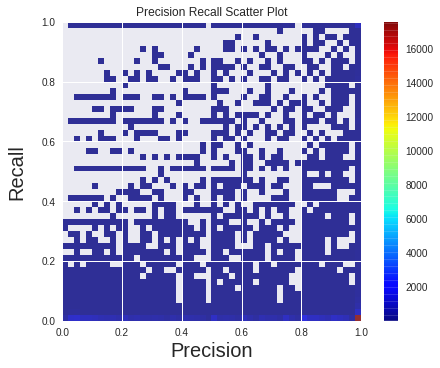

In [10]:
#Visualising the Precision-Recall density scatter-plot
nf.plot()